In [18]:
# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'runUpgrade'
testname1 = 'throughput2' # 'throughput1' or 'throughput2'


testalgo2 = 'hbbft'
testrun2 = 'runUpgrade'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")



In [20]:

def addCalcedColumns(df):
    df['blockTime'] =  df.timestamp - df.shift(1).timestamp
    df['txs'] = df.numberOfTransactions / df.blockTime
    df['blockTimeSinceStart'] =  df.timestamp - df.timestamp.min()

#blocksFile = 'data/' + testalgo + '/' + testrun + '/' + testname + '/blocks.log.csv'

# blocksFile = 'data/hbbft/proofs/poolProtection/blocks.log.csv'

blocksFile1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 + '/blocks.blocks.csv'
blocksFile2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 + '/blocks.blocks.csv'


df1 = pd.read_csv(blocksFile1)
df2 = pd.read_csv(blocksFile2)


addCalcedColumns(df1)
addCalcedColumns(df2)


# 1585951074

df1

,blockNumber,numberOfTransactions,gasUsed,timestamp,size,blockTime,txs,blockTimeSinceStart
0,984,403,8463000,1586080883,42490,NaN,NaN,0
1,985,476,9996000,1586080884,50080,1.0,476.000000,1
2,986,450,9450000,1586080886,47374,2.0,225.000000,3
3,987,326,6846000,1586080887,34480,1.0,326.000000,4
4,988,794,16674000,1586080888,83145,1.0,794.000000,5
...,...,...,...,...,...,...,...,...
996,1980,952,19992000,1592071882,99587,3.0,317.333333,5990999
997,1981,952,19992000,1592071884,99583,2.0,476.000000,5991001
998,1982,641,13461000,1592071886,67236,2.0,320.500000,5991003
999,1983,554,11634000,1592071888,58187,2.0,277.000000,5991005


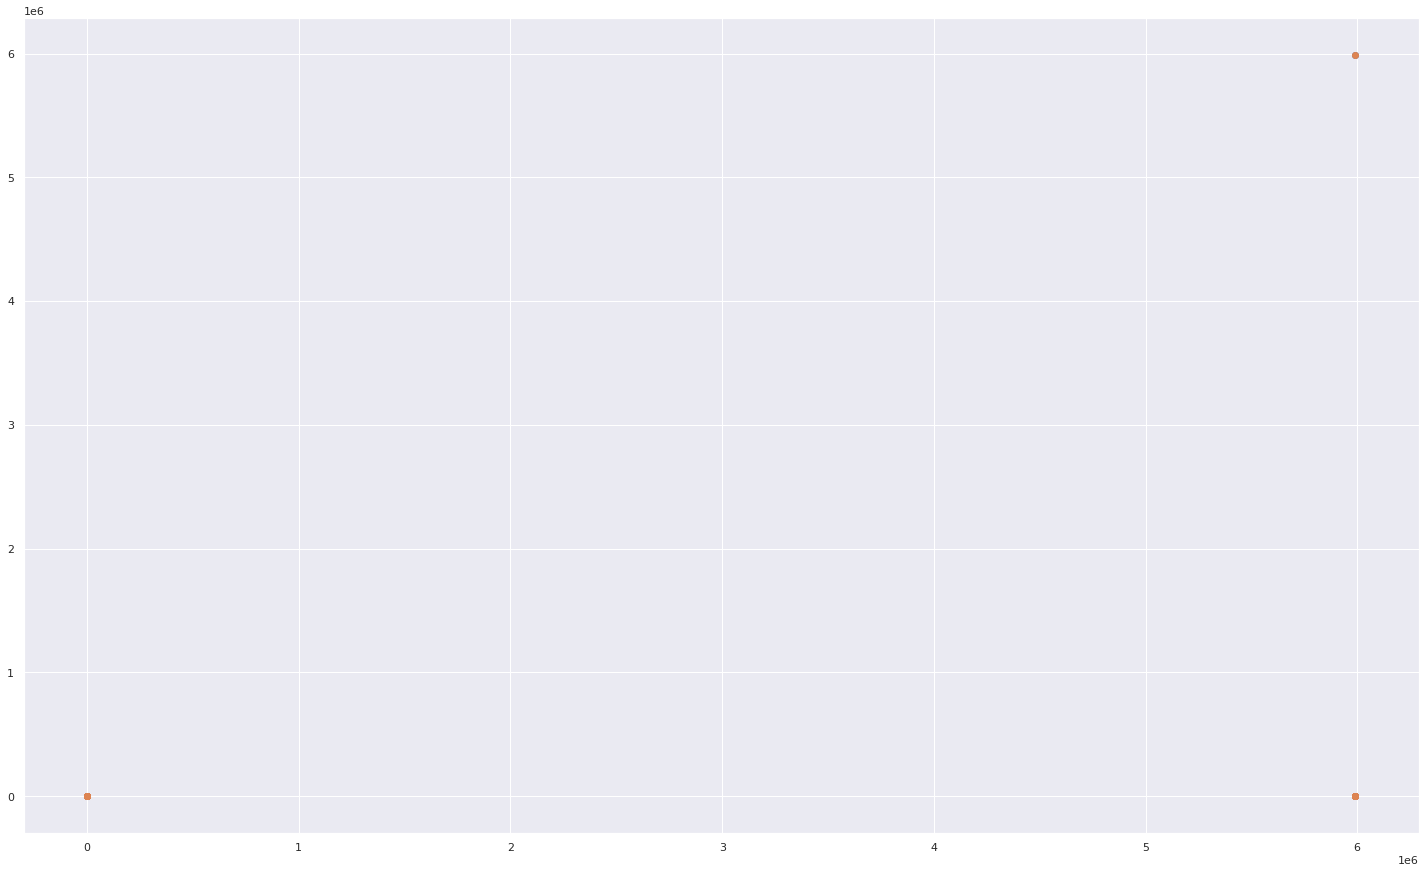

In [21]:
#blocktime chart.

plt.scatter(df1.blockTimeSinceStart, df1.blockTime)
plt.scatter(df2.blockTimeSinceStart, df2.blockTime)

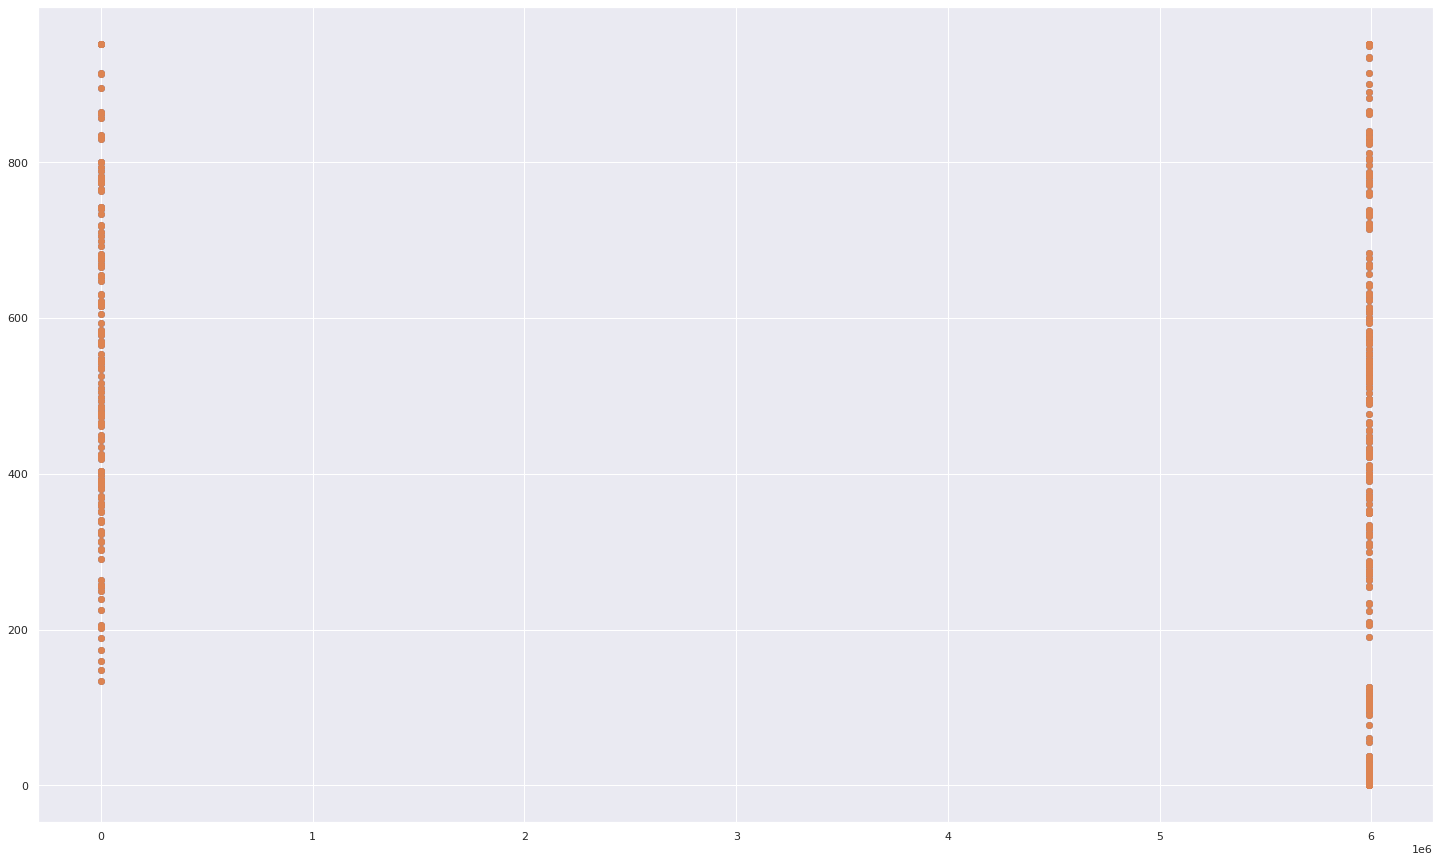

In [22]:
#transactions per block.

plt.scatter(df1.blockTimeSinceStart, df1.numberOfTransactions.rolling(window=1).mean())
# plt.plot(df1.numberOfTransactions.rolling(window=9).mean())

plt.scatter(df2.blockTimeSinceStart, df2.numberOfTransactions.rolling(window=1).mean())
# plt.plot(df2.numberOfTransactions.rolling(window=9).mean())

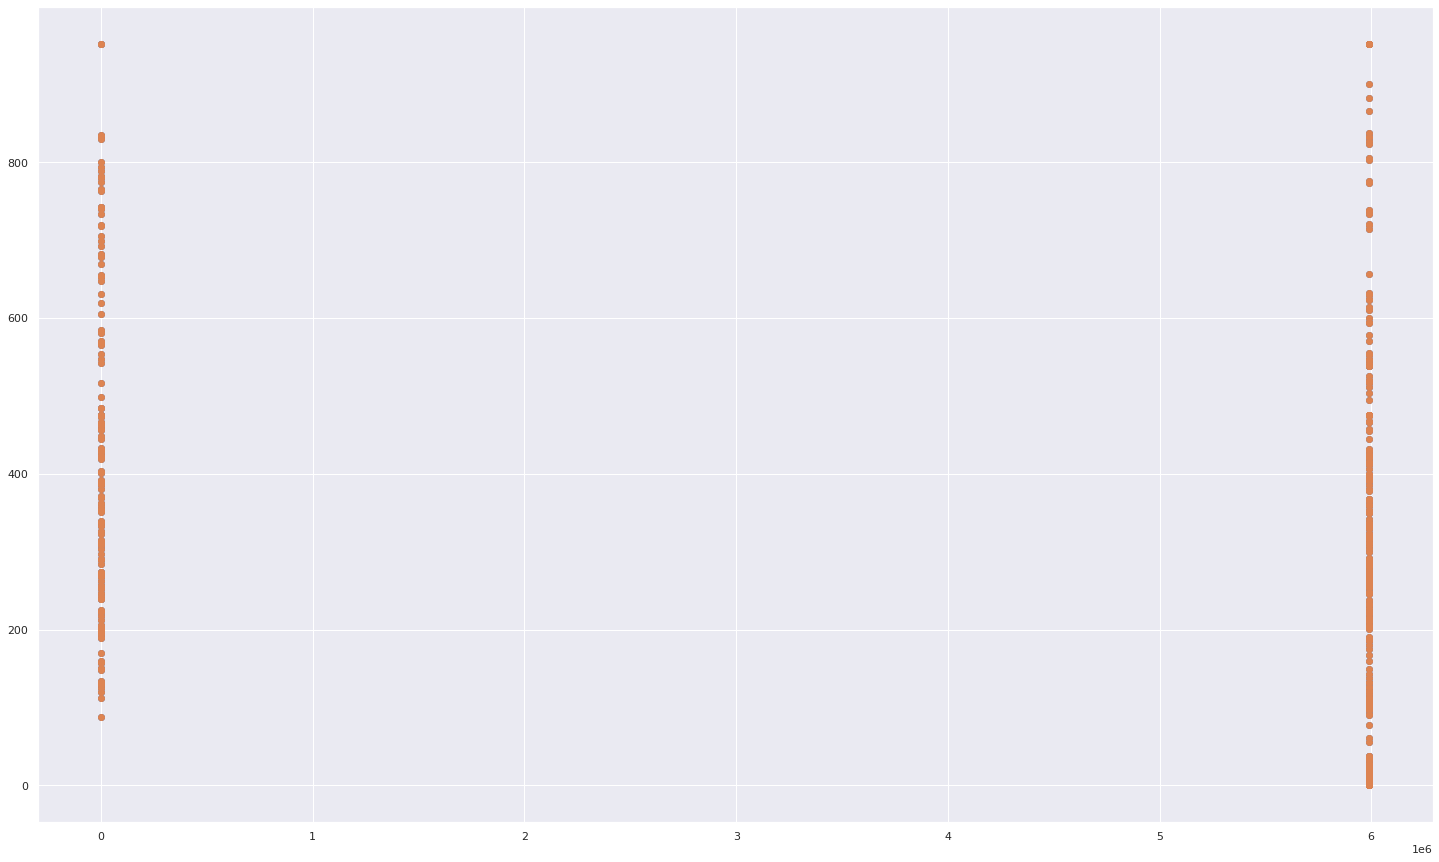

In [23]:
#plt.plot(df3.txs)
plt.scatter(df1.blockTimeSinceStart, df1.txs.rolling(window=1).mean())

#plt.plot(df4.txs)
plt.scatter(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())


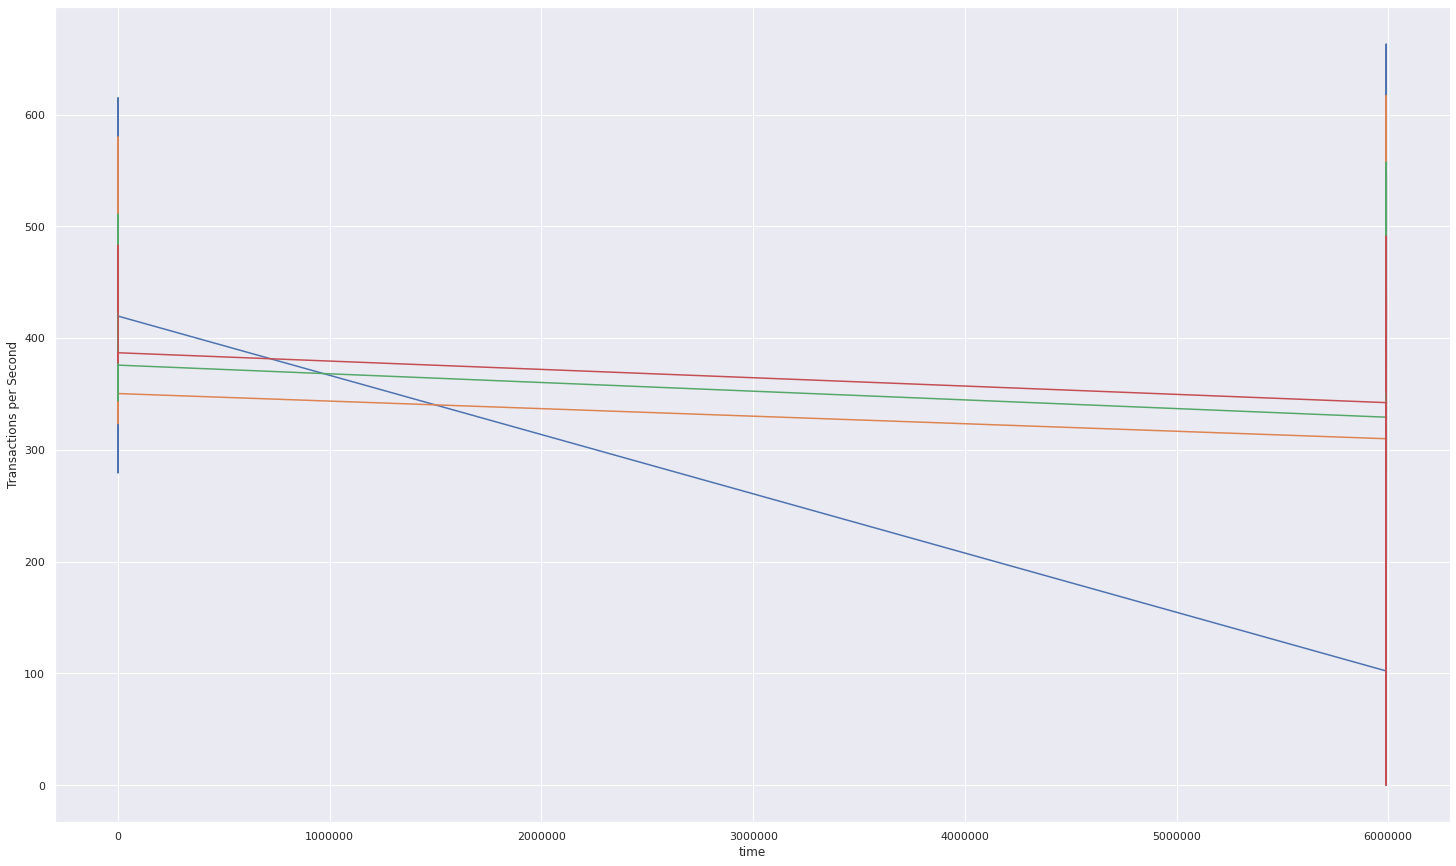

In [24]:
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=3).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=9).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=15).mean())

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    

In [25]:
# transactions per second


def printWithWindowSize(windowSize):
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=windowSize).mean(), label='7 txs all 18 ms')

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    plt.legend()
    






# plotet.write_html('output/throughput' + windowSize +'.html')


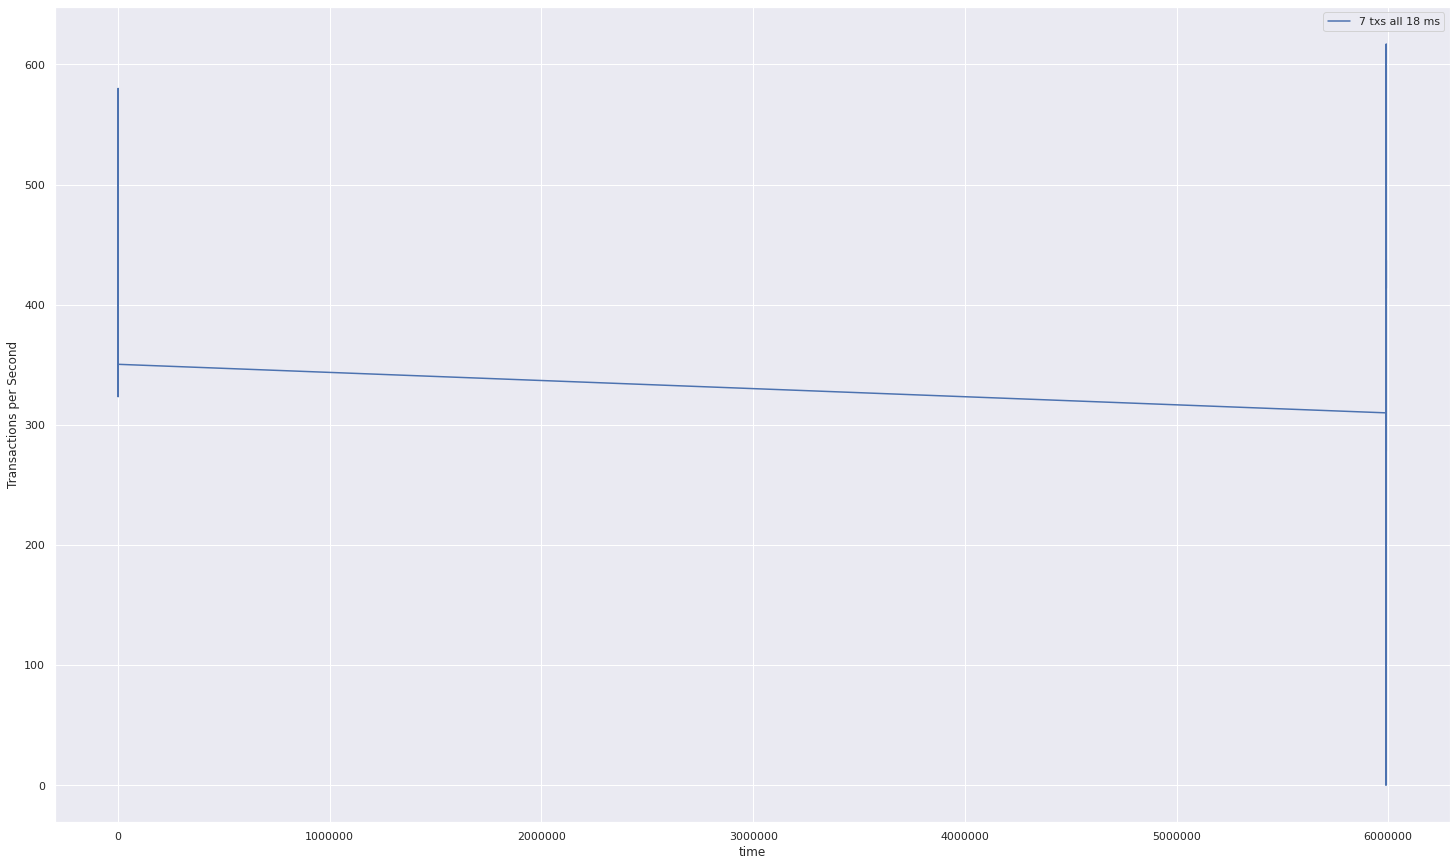

In [26]:
 
printWithWindowSize(5)


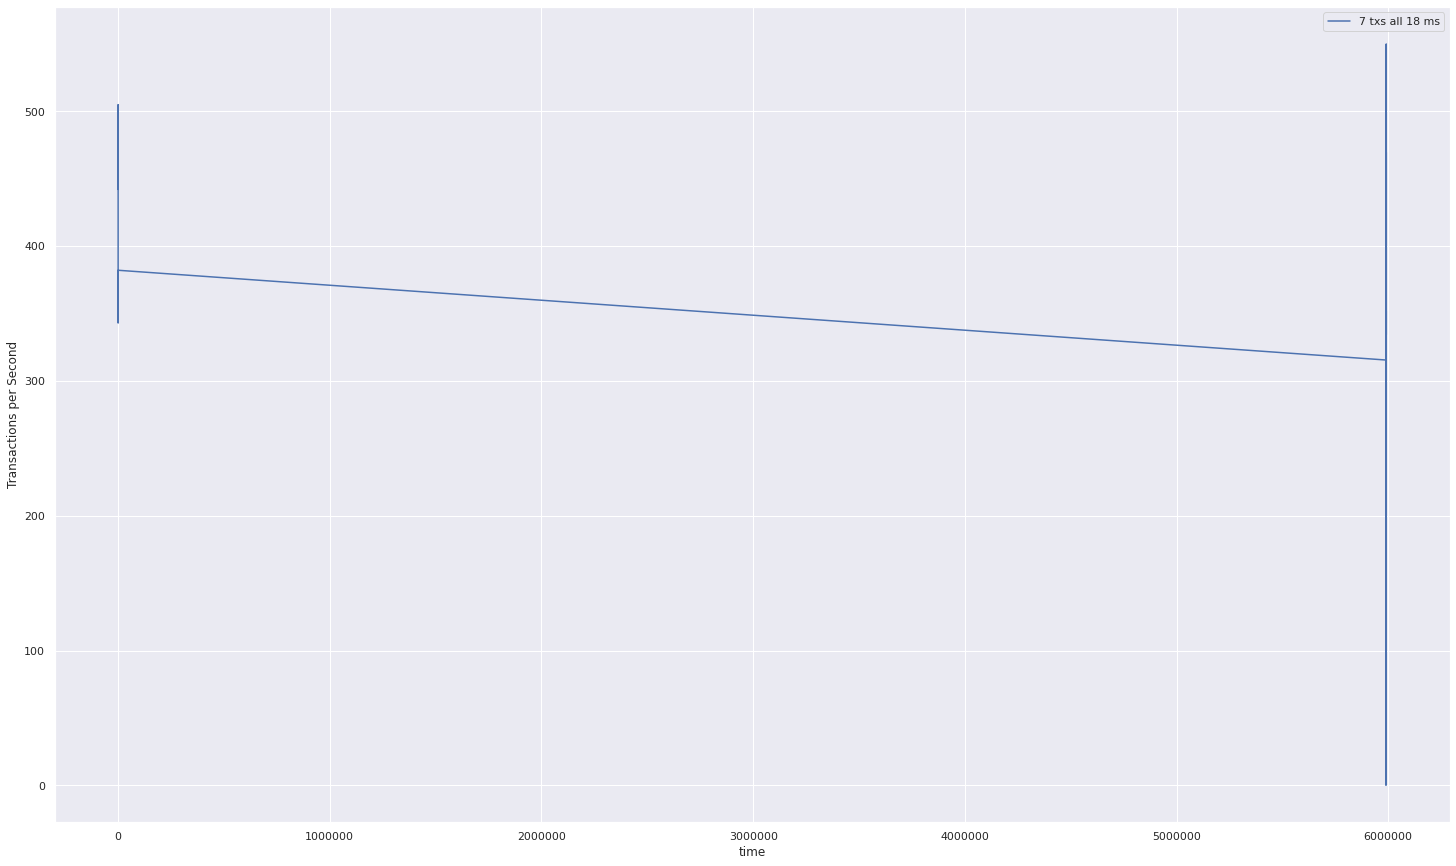

In [27]:
 
printWithWindowSize(7)


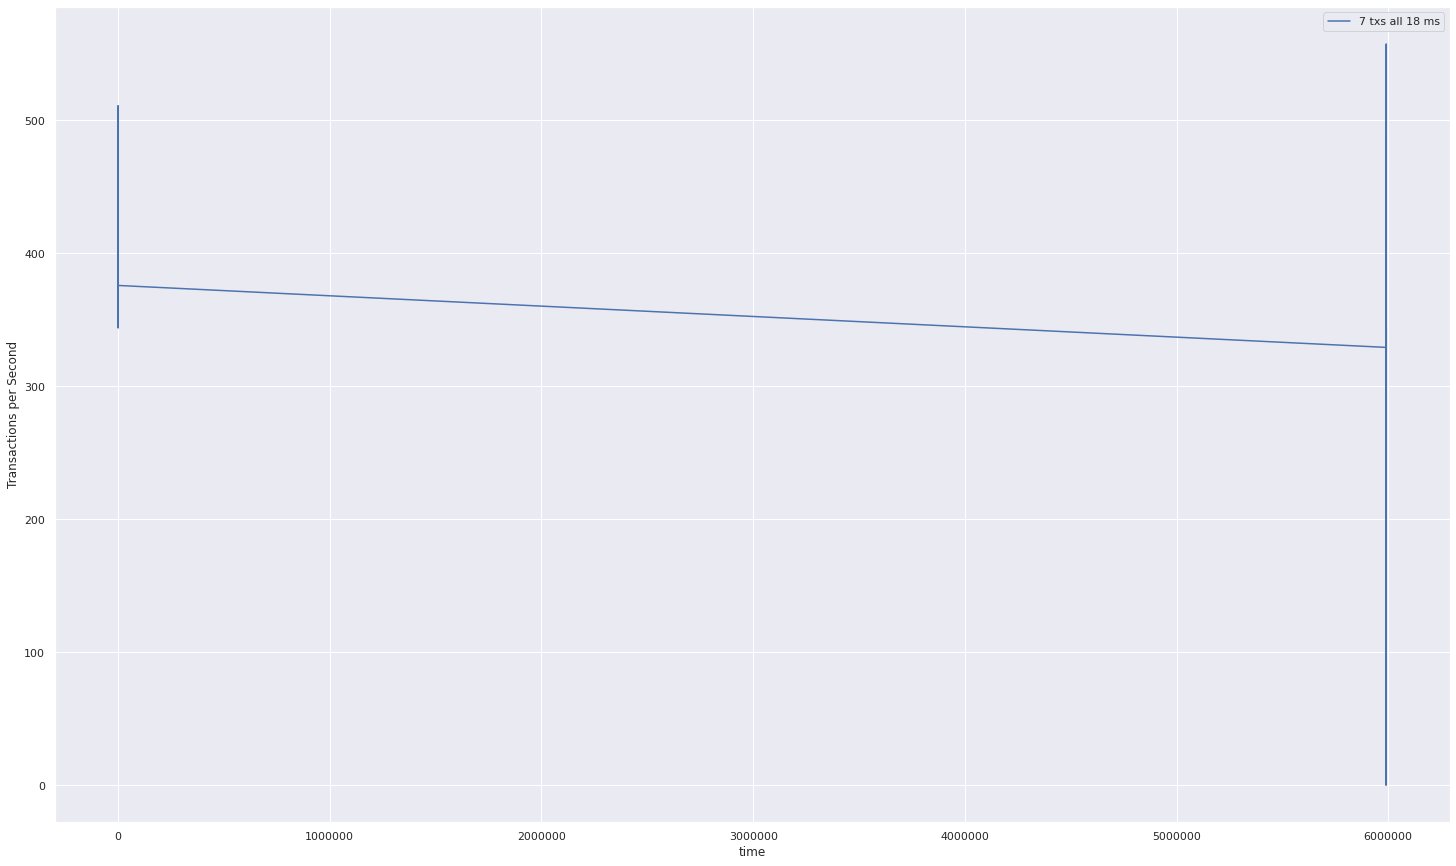

In [28]:
 
printWithWindowSize(9)


In [29]:
windowSize = 5

x = (df1.blockTimeSinceStart, df1.txs.rolling(window=windowSize).min(), df1.txs.rolling(window=windowSize).mean())
x

(0             0
 1             1
 2             3
 3             4
 4             5
          ...   
 996     5990999
 997     5991001
 998     5991003
 999     5991005
 1000    5991006
 Name: blockTimeSinceStart, Length: 1001, dtype: int64,
 0              NaN
 1              NaN
 2              NaN
 3              NaN
 4              NaN
            ...    
 996     204.500000
 997     204.500000
 998     317.333333
 999     277.000000
 1000      0.000000
 Name: txs, Length: 1001, dtype: float64,
 0              NaN
 1              NaN
 2              NaN
 3              NaN
 4              NaN
            ...    
 996     404.966667
 997     413.766667
 998     436.966667
 999     397.166667
 1000    278.166667
 Name: txs, Length: 1001, dtype: float64)

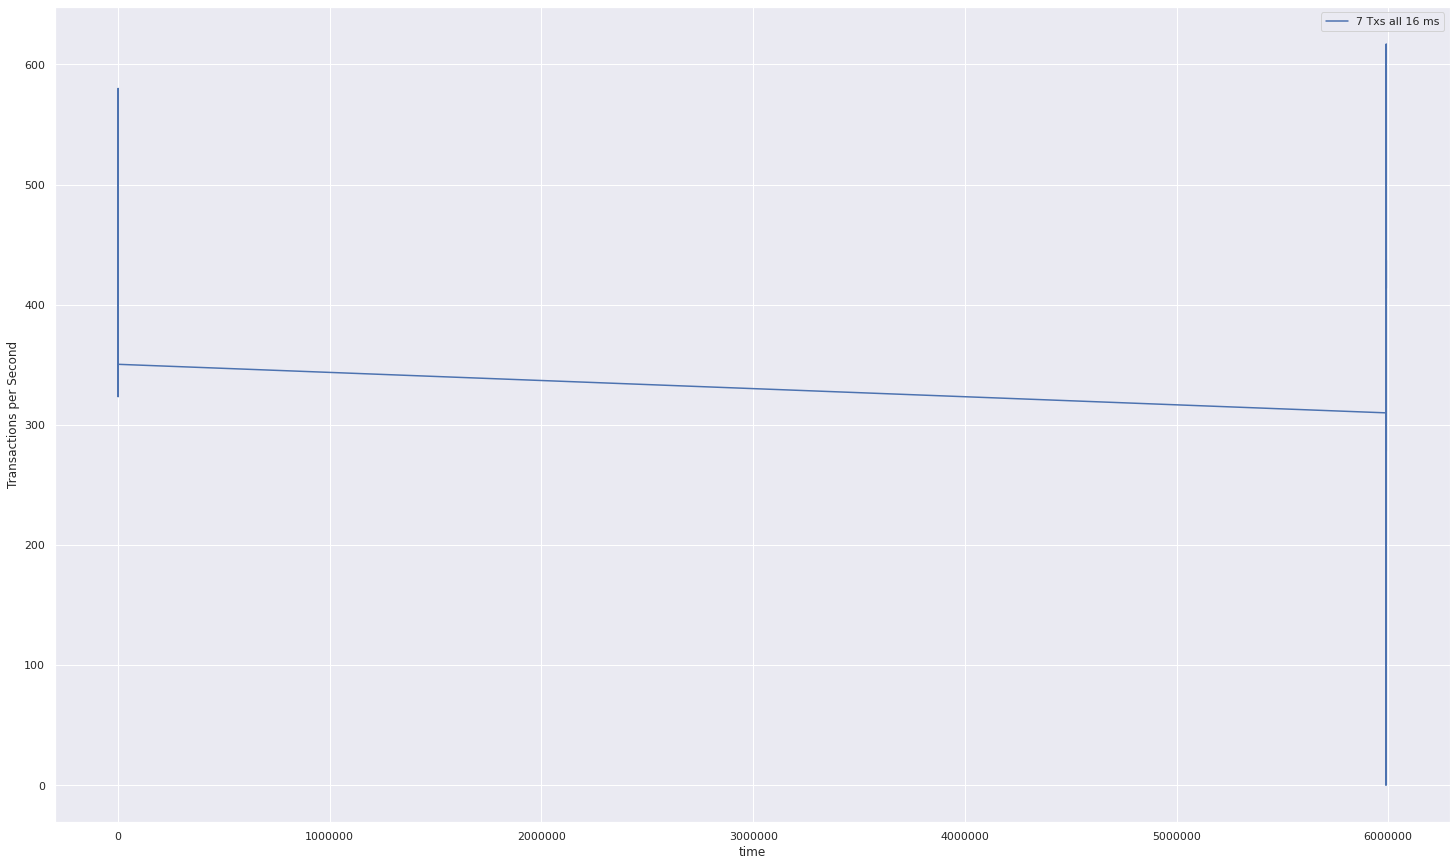

In [30]:
# transactions per second

arange = 8




plt.errorbar(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
#plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean(), label='7 txs all 18 ms')

plt.xlabel('time')
plt.ylabel('Transactions per Second')

# major_ticks = np.arange(0, 23, 1)
# plt.yticks(major_ticks)

plt.ticklabel_format(style='plain')
plt.legend()


In [31]:
df2.txs.mean()


160.37165437459487